In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("questionnaire_generation_scores_advanced.csv")
df = df.rename(columns={'rouge-l': 'rouge_l'})
df.head()

,research_question,prompt,sqp,news,rouge_l,semantic_similarity,bigram_overlap,unigram_overlap,question_similarity,system_fingerprint,random_seed,temperature
0,\n How does telemedicine affect patient sat...,tests/ablation_prompts/base_system_prompt_just...,False,False,0.12084,0.63104,0.16484,0.46535,0.0,fp_50cad350e4,53691737,0.8
1,\n How does telemedicine affect patient sat...,tests/ablation_prompts/base_system_prompt_just...,False,True,0.13031,0.63352,0.11458,0.45283,0.0,fp_50cad350e4,53691737,0.8
2,\n How does telemedicine affect patient sat...,tests/ablation_prompts/base_system_prompt_just...,True,False,0.10549,0.57909,0.10465,0.45833,0.0,fp_50cad350e4,53691737,0.8
3,\n How does telemedicine affect patient sat...,tests/ablation_prompts/base_system_prompt_just...,True,True,0.10695,0.62756,0.15909,0.45918,0.0,fp_50cad350e4,53691737,0.8
4,\n How does telemedicine affect patient sat...,tests/ablation_prompts/base_system_prompt.txt,False,False,0.11614,0.63379,0.17544,0.46774,0.0,fp_50cad350e4,53691737,0.8


In [3]:
df[df.isna()].sum()

research_question        0
prompt                   0
sqp                      0
news                     0
rouge_l                0.0
semantic_similarity    0.0
bigram_overlap         0.0
unigram_overlap        0.0
question_similarity    0.0
system_fingerprint       0
random_seed            0.0
temperature            0.0
dtype: object

In [4]:
df.shape

(2000, 12)

In [4]:
df.research_question.unique()

array(['\n    How does telemedicine affect patient satisfaction and adherence to treatment among urban adults?\n    Target Demographics: Adults aged 18-65 in urban areas who have used telemedicine services at least once in the past year.\n    Topics in Survey:\n\n        Frequency and purpose of telemedicine use\n        Perceived accessibility and ease of use of telemedicine\n        Levels of satisfaction with virtual consultations compared to in-person visits\n        Adherence to prescribed treatments following telemedicine consultations\n        Concerns or limitations faced when using telemedicine services\n\n    ',
       '\n    What factors influence the shift from in-store to online shopping among millennials and Gen Z consumers in North America?\n    Target Demographics: Millennials (25-40) and Gen Z (18-24) in North America, who have made at least one online purchase in the past six months.\n    Topics in Survey:\n\n        Frequency of online vs. in-store shopping\n        

In [5]:
df.shape

(2000, 12)

In [4]:
rq_map = {rq: f"RQ{i+1}" for i, rq in enumerate(df.research_question.unique())}
pr_map = {'tests/ablation_prompts/base_system_prompt.txt': 'base+instructions', 'tests/ablation_prompts/base_system_prompt_just_the_output_format.txt': 'base'}

In [5]:
df['RQ'] = df.research_question.map(rq_map)
df['prompt'] = df.prompt.map(pr_map)

In [104]:
df.groupby(["RQ", "prompt", "sqp", "news"])[['rouge_l', 'semantic_similarity', 'bigram_overlap']].mean()

rouge_l  semantic_similarity  \
RQ  prompt            sqp   news                                   
RQ1 base              False False  0.120162             0.629705   
                            True   0.119417             0.631493   
                      True  False  0.117107             0.625690   
                            True   0.119900             0.635019   
    base+instructions False False  0.123817             0.631371   
                            True   0.124020             0.631309   
                      True  False  0.120280             0.614391   
                            True   0.120842             0.610042   
RQ2 base              False False  0.083558             0.480617   
                            True   0.081788             0.460198   
                      True  False  0.085991             0.472009   
                            True   0.084509             0.462050   
    base+instructions False False  0.085374             0.482050   
                            True   0.085190             0.471992   
                      True  False  0.083185             0.446707   
                            True   0.087929             0.457330   
RQ3 base              False False  0.067397             0.512740   
                            True   0.068358             0.510192   
                      True  False  0.069161             0.517546   
                            True   0.071945             0.514055   
    base+instructions False False  0.068030             0.511690   
                            True   0.070461             0.503994   
                      True  False  0.068159             0.506516   
                            True   0.062500             0.489148   
RQ4 base              False False  0.142312             0.626277   
                            True   0.136458             0.589341   
                      True  False  0.141732             0.618791   
                            True   0.135095             0.597173   
    base+instructions False False  0.136915             0.615342   
                            True   0.131630             0.581952   
                      True  False  0.146055             0.614753   
                            True   0.131466             0.580724   
RQ5 base              False False  0.138503             0.589421   
                            True   0.138778             0.572461   
                      True  False  0.151036             0.586966   
                            True   0.146430             0.578777   
    base+instructions False False  0.143059             0.590054   
                            True   0.138554             0.568263   
                      True  False  0.154950             0.581437   
                            True   0.147082             0.568507   

                                   bigram_overlap  
RQ  prompt            sqp   news                   
RQ1 base              False False        0.125163  
                            True         0.134063  
                      True  False        0.125045  
                            True         0.137105  
    base+instructions False False        0.121247  
                            True         0.129534  
                      True  False        0.132420  
                            True         0.139836  
RQ2 base              False False        0.147909  
                            True         0.133462  
                      True  False        0.145136  
                            True         0.134534  
    base+instructions False False        0.153491  
                            True         0.138773  
                      True  False        0.136433  
                            True         0.127912  
RQ3 base              False False        0.107215  
                            True         0.097180  
                      True  False        0.114523  
                            True         0.115963  
    base+instructions False False  

In [6]:
# Group by prompt
prompt_effect = df.groupby('prompt')[['rouge_l', 'semantic_similarity', 'bigram_overlap', 'unigram_overlap', 'question_similarity']].mean()

# Compare SQP inclusion
sqp_effect = df.groupby('sqp')[['rouge_l', 'semantic_similarity', 'bigram_overlap', 'question_similarity']].mean()

# Compare News inclusion
news_effect = df.groupby('news')[['rouge_l', 'semantic_similarity', 'bigram_overlap', 'question_similarity']].mean()

# Compare temperature inclusion
temperature_effect = df.groupby('temperature')[['rouge_l', 'semantic_similarity', 'bigram_overlap', 'question_similarity']].mean()

# Random seed effect
random_seed_effect = df.groupby('random_seed')[['rouge_l', 'semantic_similarity', 'bigram_overlap', 'question_similarity']].mean()

In [7]:
prompt_effect

,rouge_l,semantic_similarity,bigram_overlap,unigram_overlap,question_similarity
prompt,,,,,
base,0.110982,0.560526,0.153998,0.450742,0.0086
base+instructions,0.111475,0.552879,0.144225,0.450395,0.0040


In [9]:
sqp_effect

,rouge_l,semantic_similarity,bigram_overlap,question_similarity
sqp,,,,
False,0.110189,0.559523,0.148462,0.0061
True,0.112268,0.553882,0.149760,0.0065


In [11]:
news_effect

,rouge_l,semantic_similarity,bigram_overlap,question_similarity
news,,,,
False,0.112339,0.562704,0.156838,0.0086
True,0.110118,0.550701,0.141385,0.0040


In [13]:
temperature_effect

,rouge_l,semantic_similarity,bigram_overlap,question_similarity
temperature,,,,
0.8,0.113286,0.555443,0.158642,0.00850
0.9,0.111863,0.555710,0.156443,0.00675
1.0,0.111675,0.556743,0.149422,0.00675
1.1,0.109915,0.557046,0.142322,0.00450
1.2,0.109402,0.558570,0.138727,0.00500


<Axes: title={'center': 'Effect of Random seed'}, xlabel='random_seed'>

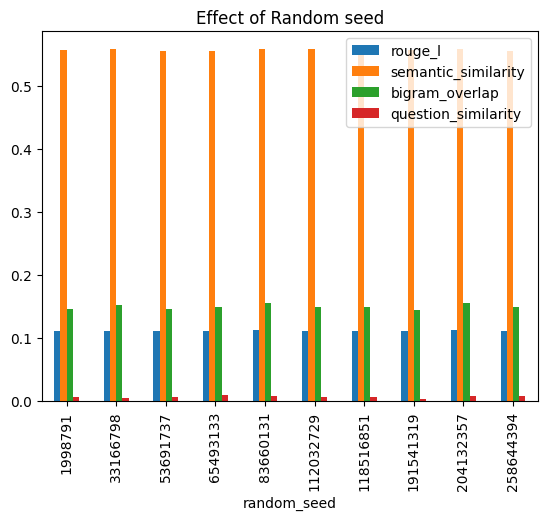

In [16]:
random_seed_effect.plot(kind='bar', title='Effect of Random seed')

In [17]:
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

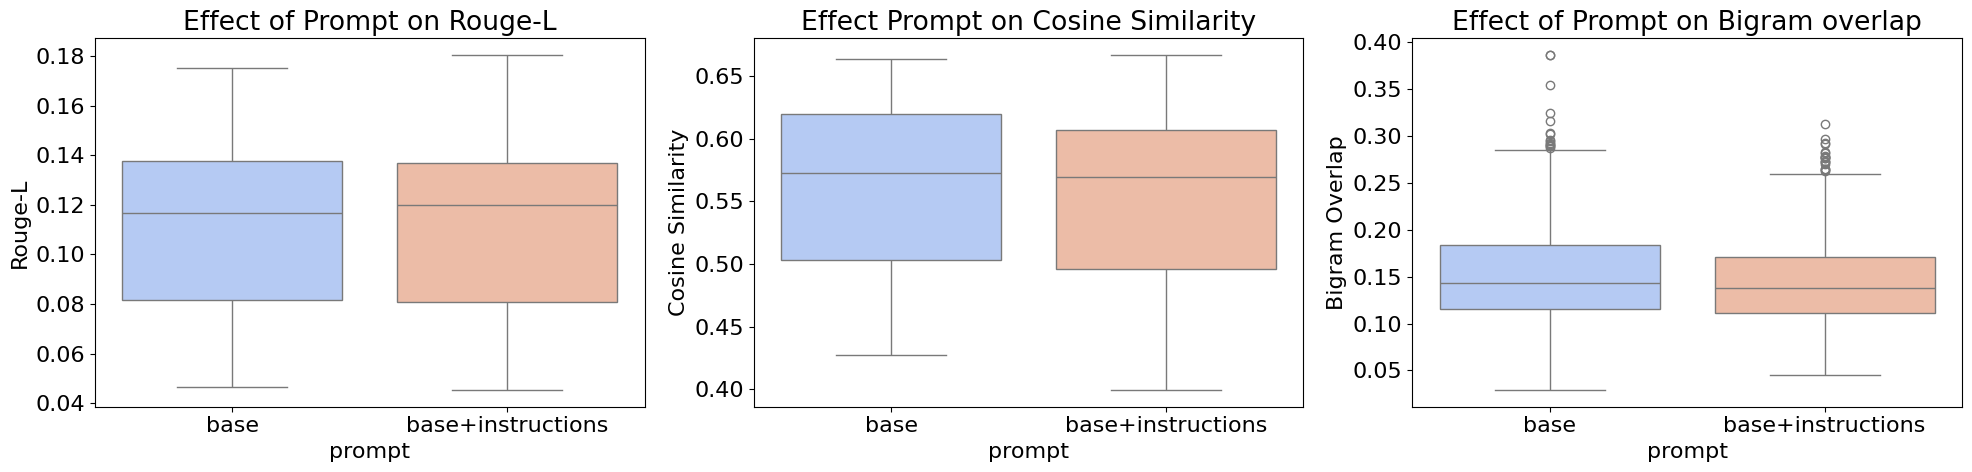

In [18]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# First plot: Boxplot
sns.boxplot(
    data=df,
    x='prompt',
    y='rouge_l',
    hue='prompt',
    # style='news',            # Line style for news inclusion
    palette='coolwarm',      # Color palette for temperature
    # order=['base', 'base+instructions'],
    # markers=True,
    # dashes=True,
    ax=axes[0]
)
axes[0].set_title("Effect of Prompt on Rouge-L")
axes[0].set_ylabel("Rouge-L")

# Second plot: Scatter plot
sns.boxplot(
    data=df,
    x='prompt',
    y='semantic_similarity',
    # order=['base', 'base+instructions'],
    hue='prompt',
    # hue='sqp',
    # style='news',            # Line style for news inclusion
    palette='coolwarm',      # Color palette for temperature
    # markers=True,
    # dashes=True,
    ax=axes[1]
)
axes[1].set_title("Effect Prompt on Cosine Similarity")
axes[1].set_ylabel("Cosine Similarity")

# Third plot: Bar plot
sns.boxplot(
    data=df,
    x='prompt',
    y='bigram_overlap',
    # order=['base', 'base+instructions'],
    hue='prompt',
    # style='news',            # Line style for news inclusion
    palette='coolwarm',      # Color palette for temperature
    # markers=True,
    # dashes=True,
    ax=axes[2]
)
axes[2].set_title("Effect of Prompt on Bigram overlap")
axes[2].set_ylabel("Bigram Overlap")

# Adjust layout
plt.tight_layout()

# save figure
plt.savefig("plots/prompt_effect.png")
# # fig.text(0.5, 0.0001, "Figure 1: Analysis of Tips Dataset", ha='center', fontsize=12)

In [20]:
temperature_effect

,rouge_l,semantic_similarity,bigram_overlap,question_similarity
temperature,,,,
0.8,0.113286,0.555443,0.158642,0.00850
0.9,0.111863,0.555710,0.156443,0.00675
1.0,0.111675,0.556743,0.149422,0.00675
1.1,0.109915,0.557046,0.142322,0.00450
1.2,0.109402,0.558570,0.138727,0.00500


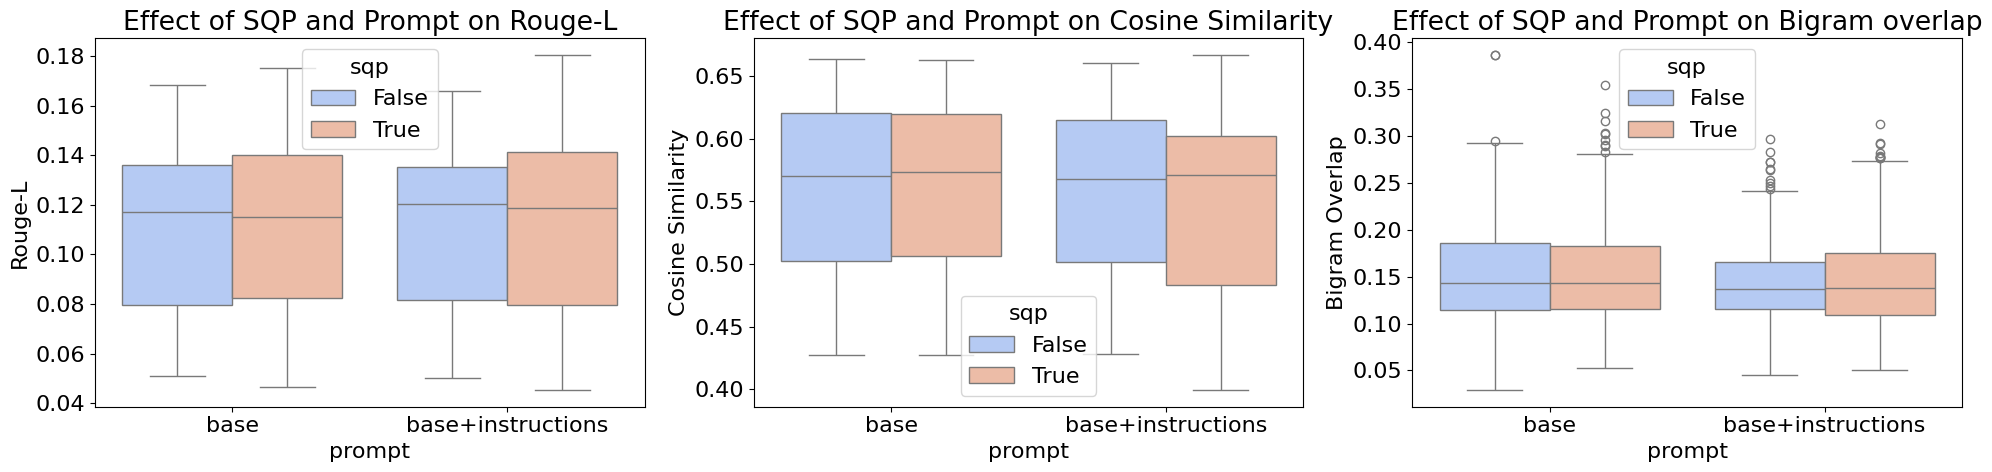

In [99]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# First plot: Boxplot
sns.boxplot(
    data=df,
    x='prompt', 
    y='rouge_l',
    hue='sqp',
    order=['base', 'base+instructions'],
    # style='news',            # Line style for news inclusion
    palette='coolwarm',      # Color palette for temperature
    # markers=True,
    # dashes=True,
    ax=axes[0]
)
axes[0].set_title("Effect of SQP and Prompt on Rouge-L")
axes[0].set_ylabel("Rouge-L")

# Second plot: Scatter plot
sns.boxplot(
    data=df,
    x='prompt', 
    y='semantic_similarity',
    hue='sqp',
    order=['base', 'base+instructions'],
    # style='news',            # Line style for news inclusion
    palette='coolwarm',      # Color palette for temperature
    # markers=True,
    # dashes=True,
    ax=axes[1]
)
axes[1].set_title("Effect of SQP and Prompt on Cosine Similarity")
axes[1].set_ylabel("Cosine Similarity")

# Third plot: Bar plot
sns.boxplot(
    data=df,
    x='prompt', 
    y='bigram_overlap',
    hue='sqp',
    order=['base', 'base+instructions'],
    # style='news',            # Line style for news inclusion
    palette='coolwarm',      # Color palette for temperature
    # markers=True,
    # dashes=True,
    ax=axes[2]
)
axes[2].set_title("Effect of SQP and Prompt on Bigram overlap")
axes[2].set_ylabel("Bigram Overlap")

# Adjust layout
plt.tight_layout()

# save figure
plt.savefig("plots/sqp_prompt_effect.png")
# # fig.text(0.5, 0.0001, "Figure 1: Analysis of Tips Dataset", ha='center', fontsize=12)

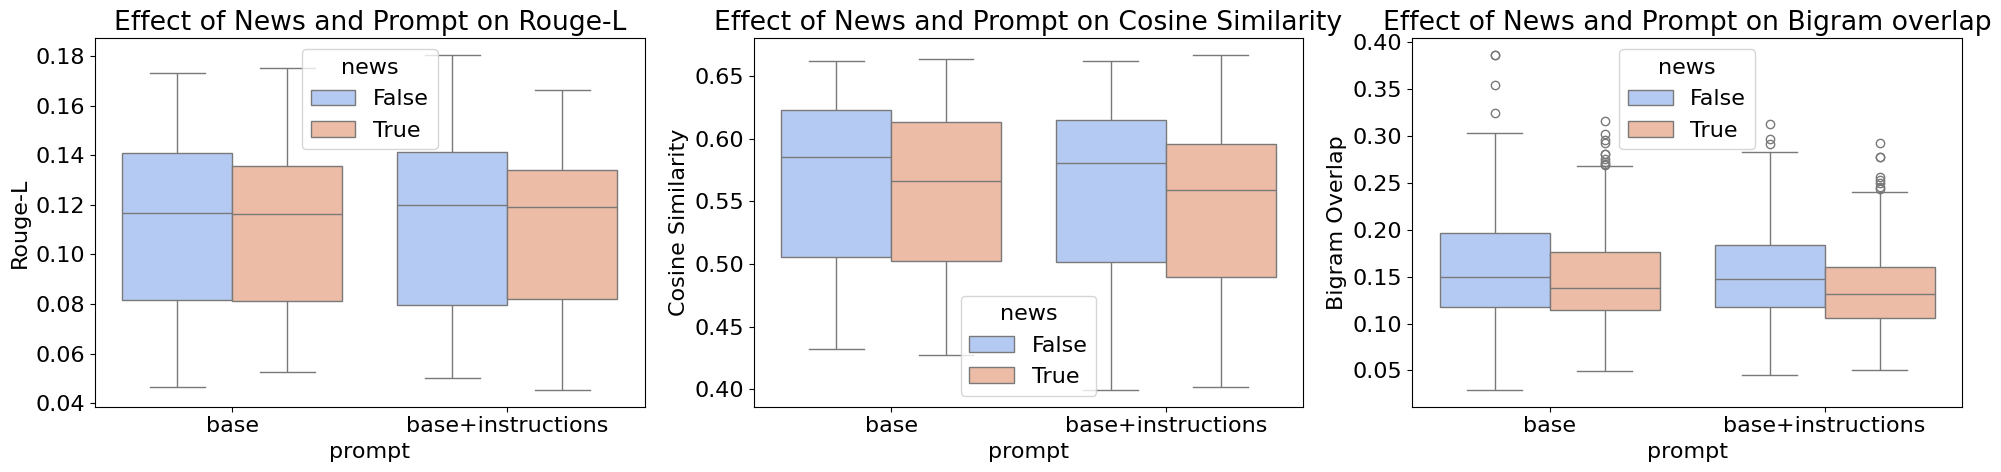

In [100]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# First plot: Boxplot
sns.boxplot(
    data=df,
    x='prompt', 
    y='rouge_l',
    hue='news',
    order=['base', 'base+instructions'],
    # style='news',            # Line style for news inclusion
    palette='coolwarm',      # Color palette for temperature
    # markers=True,
    # dashes=True,
    ax=axes[0]
)
axes[0].set_title("Effect of News and Prompt on Rouge-L")
axes[0].set_ylabel("Rouge-L")

# Second plot: Scatter plot
sns.boxplot(
    data=df,
    x='prompt', 
    y='semantic_similarity',
    hue='news',
    order=['base', 'base+instructions'],
    # style='news',            # Line style for news inclusion
    palette='coolwarm',      # Color palette for temperature
    # markers=True,
    # dashes=True,
    ax=axes[1]
)
axes[1].set_title("Effect of News and Prompt on Cosine Similarity")
axes[1].set_ylabel("Cosine Similarity")

# Third plot: Bar plot
sns.boxplot(
    data=df,
    x='prompt', 
    y='bigram_overlap',
    hue='news',
    order=['base', 'base+instructions'],
    # style='news',            # Line style for news inclusion
    palette='coolwarm',      # Color palette for temperature
    # markers=True,
    # dashes=True,
    ax=axes[2]
)
axes[2].set_title("Effect of News and Prompt on Bigram overlap")
axes[2].set_ylabel("Bigram Overlap")

# Adjust layout
plt.tight_layout()

# save figure
plt.savefig("plots/news_prompt_effect.png")
# # fig.text(0.5, 0.0001, "Figure 1: Analysis of Tips Dataset", ha='center', fontsize=12)

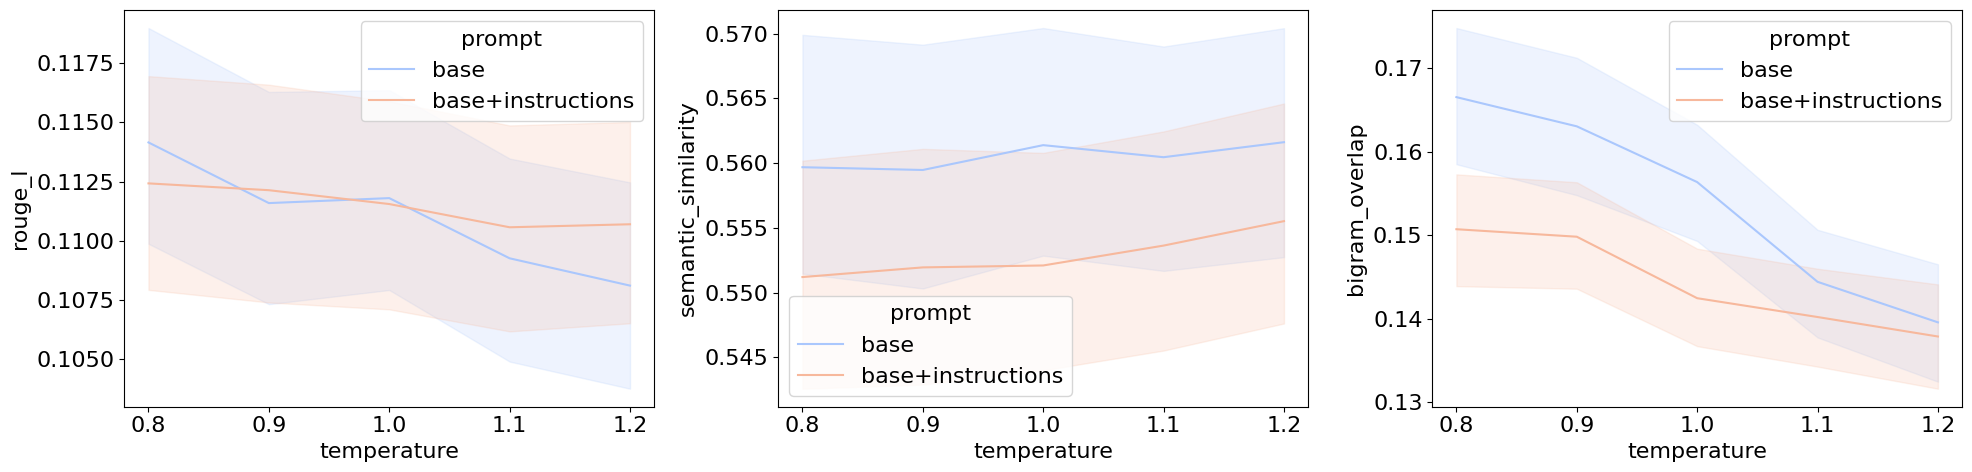

In [101]:
# Plot grid of temperature vs metrics

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# First plot: Lineplot
sns.lineplot(
    data=df,
    x='temperature', 
    y='rouge_l',
    hue='prompt',
    palette='coolwarm',      # Color palette for temperature
    ax=axes[0]
).set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

# Second plot: Lineplot
sns.lineplot(
    data=df,
    x='temperature', 
    y='semantic_similarity',
    hue='prompt',
    palette='coolwarm',      # Color palette for temperature
    ax=axes[1]
).set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

# Third plot: Lineplot
sns.lineplot(
    data=df,
    x='temperature', 
    y='bigram_overlap',
    hue='prompt',
    palette='coolwarm',      # Color palette for temperature
    ax=axes[2]
).set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

# Adjust layout
plt.tight_layout()

# save figure
plt.savefig("plots/temperature_prompt_effect.png")

# _ = sns.lineplot(data=df, x='temperature', y='semantic_similarity', hue='prompt').set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

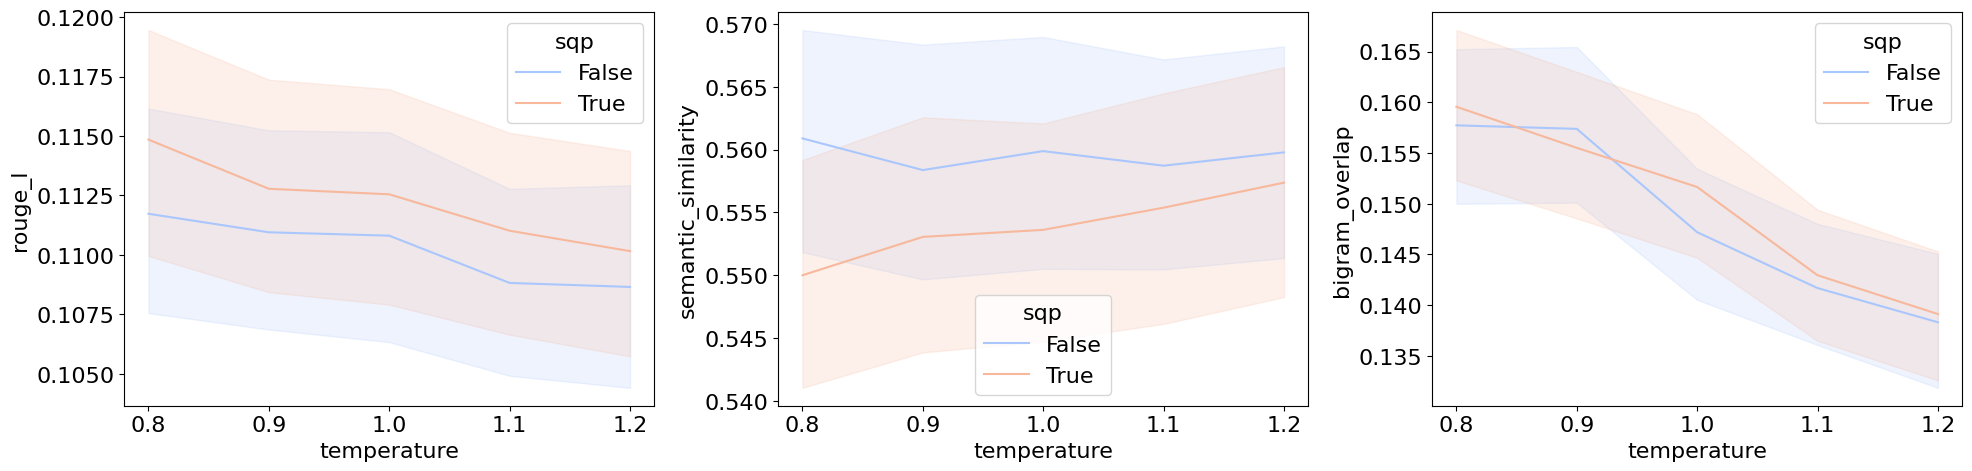

In [102]:
# Plot grid of temperature vs metrics

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# First plot: Lineplot
sns.lineplot(
    data=df,
    x='temperature', 
    y='rouge_l',
    hue='sqp',
    palette='coolwarm',      # Color palette for temperature
    ax=axes[0]
).set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

# Second plot: Lineplot
sns.lineplot(
    data=df,
    x='temperature', 
    y='semantic_similarity',
    hue='sqp',
    palette='coolwarm',      # Color palette for temperature
    ax=axes[1]
).set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

# Third plot: Lineplot
sns.lineplot(
    data=df,
    x='temperature', 
    y='bigram_overlap',
    hue='sqp',
    palette='coolwarm',      # Color palette for temperature
    ax=axes[2]
).set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

# Adjust layout
plt.tight_layout()

# save figure
plt.savefig("plots/temperature_sqp_effect.png")

# _ = sns.lineplot(data=df, x='temperature', y='semantic_similarity', hue='prompt').set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

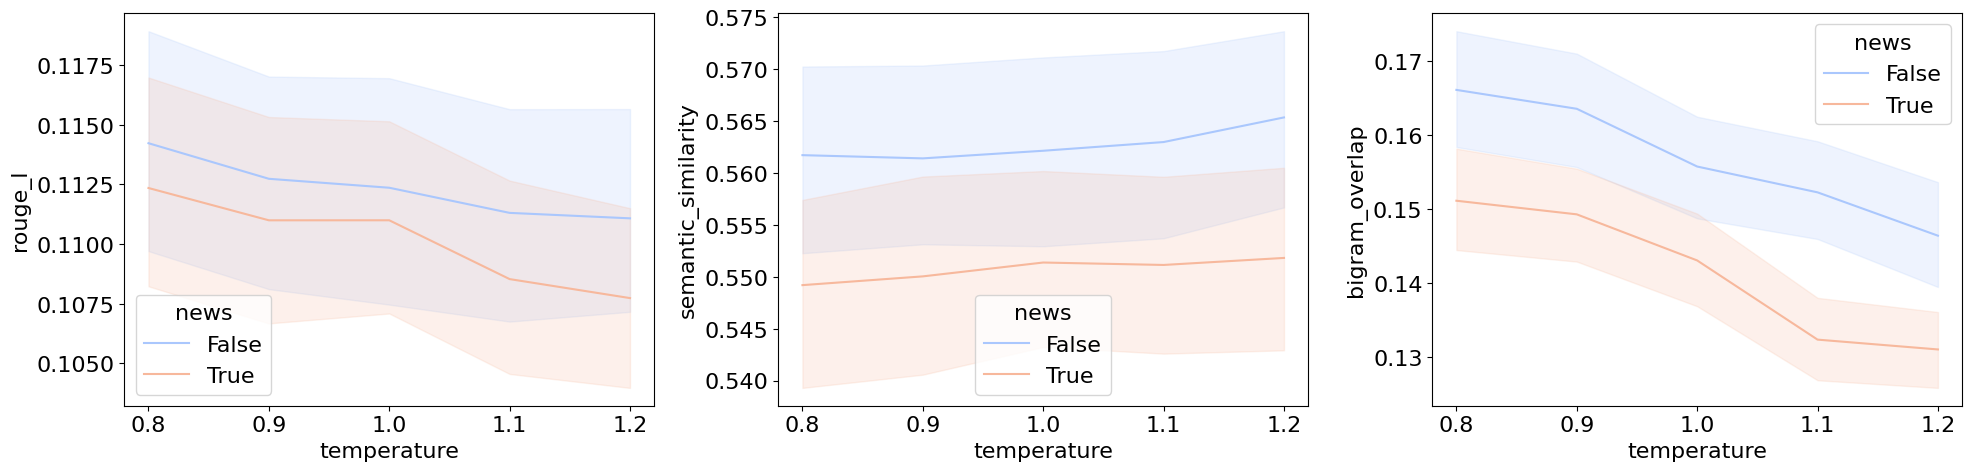

In [103]:
# Plot grid of temperature vs metrics

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# First plot: Lineplot
sns.lineplot(
    data=df,
    x='temperature', 
    y='rouge_l',
    hue='news',
    palette='coolwarm',      # Color palette for temperature
    ax=axes[0]
).set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

# Second plot: Lineplot
sns.lineplot(
    data=df,
    x='temperature', 
    y='semantic_similarity',
    hue='news',
    palette='coolwarm',      # Color palette for temperature
    ax=axes[1]
).set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

# Third plot: Lineplot
sns.lineplot(
    data=df,
    x='temperature', 
    y='bigram_overlap',
    hue='news',
    palette='coolwarm',      # Color palette for temperature
    ax=axes[2]
).set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

# Adjust layout
plt.tight_layout()

# save figure
plt.savefig("plots/temperature_news_effect.png")

# _ = sns.lineplot(data=df, x='temperature', y='semantic_similarity', hue='prompt').set(xticks=[0.8, 0.9, 1.0, 1.1, 1.2])

#### Analyze Interaction effects

In [20]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 41.7 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [36]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('semantic_similarity ~ C(sqp) * C(news) * C(prompt)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df          F    PR(>F)
C(sqp)                    0.015913     1.0   3.903896  0.048312
C(news)                   0.072031     1.0  17.671037  0.000027
C(prompt)                 0.029241     1.0   7.173524  0.007460
C(sqp):C(news)            0.003932     1.0   0.964717  0.326121
C(sqp):C(prompt)          0.019249     1.0   4.722179  0.029893
C(news):C(prompt)         0.000608     1.0   0.149045  0.699491
C(sqp):C(news):C(prompt)  0.000858     1.0   0.210549  0.646388
Residual                  8.119863  1992.0        NaN       NaN


In [37]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('rouge_l ~ C(sqp) * C(news) * C(prompt)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df         F    PR(>F)
C(sqp)                    0.002160     1.0  2.144526  0.143237
C(news)                   0.002468     1.0  2.449713  0.117705
C(prompt)                 0.000122     1.0  0.120641  0.728377
C(sqp):C(news)            0.000300     1.0  0.297457  0.585542
C(sqp):C(prompt)          0.000145     1.0  0.144066  0.704312
C(news):C(prompt)         0.000315     1.0  0.312506  0.576210
C(sqp):C(news):C(prompt)  0.000299     1.0  0.296397  0.586211
Residual                  2.006507  1992.0       NaN       NaN


In [38]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('bigram_overlap ~ C(sqp) * C(news) * C(prompt) * temperature', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                        sum_sq      df          F  \
C(sqp)                                0.000843     1.0   0.350846   
C(news)                               0.119400     1.0  49.692047   
C(prompt)                             0.047758     1.0  19.875842   
C(sqp):C(news)                        0.001402     1.0   0.583413   
C(sqp):C(prompt)                      0.000369     1.0   0.153607   
C(news):C(prompt)                     0.001721     1.0   0.716362   
C(sqp):C(news):C(prompt)              0.002173     1.0   0.904383   
temperature                           0.116424     1.0  48.453430   
C(sqp):temperature                    0.000012     1.0   0.004960   
C(news):temperature                   0.000413     1.0   0.171987   
C(prompt):temperature                 0.013883     1.0   5.777865   
C(sqp):C(news):temperature            0.001112     1.0   0.462654   
C(sqp):C(prompt):temperature          0.001081     1.0   0.449852   
C(news):C(prompt):temperature     

In [41]:
from statsmodels.multivariate.manova import MANOVA

from statsmodels.formula.api import ols
import statsmodels.api as sm


manova = MANOVA.from_formula('rouge_l + semantic_similarity + bigram_overlap ~ C(sqp) * C(news) * C(prompt) * temperature', data=df)
print(manova.mv_test())

                         Multivariate linear model
                                                                            
------------------------------------------------------------------------------
            Intercept          Value    Num DF     Den DF    F Value    Pr > F
------------------------------------------------------------------------------
               Wilks' lambda   0.7293   3.0000   1982.0000   245.2632   0.0000
              Pillai's trace   0.2707   3.0000   1982.0000   245.2632   0.0000
      Hotelling-Lawley trace   0.3712   3.0000   1982.0000   245.2632   0.0000
         Roy's greatest root   0.3712   3.0000   1982.0000   245.2632   0.0000
----------------------------------------------------------------------------
                                                                            
------------------------------------------------------------------------------
               C(sqp)           Value    Num DF     Den DF    F Value   Pr > F
-------

In [26]:
df.corr(numeric_only=True)

,sqp,news,rouge_l,semantic_similarity,n_gram_overlap,question_similarity,random_seed,temperature
sqp,1.000000e+00,3.330669e-19,-0.002907,-0.026212,0.000021,-0.019940,-1.641081e-17,1.079439e-18
news,3.330669e-19,1.000000e+00,-0.015373,-0.031306,-0.085169,0.008493,-7.258307e-19,-5.299062e-18
rouge_l,-2.907188e-03,-1.537324e-02,1.000000,0.771843,0.569631,0.323880,1.228974e-02,-4.164934e-02
semantic_similarity,-2.621163e-02,-3.130591e-02,0.771843,1.000000,0.267346,0.239944,2.042006e-02,-1.111809e-02
n_gram_overlap,2.116783e-05,-8.516886e-02,0.569631,0.267346,1.000000,0.316076,4.786758e-02,-1.721942e-01
question_similarity,-1.993967e-02,8.492771e-03,0.323880,0.239944,0.316076,1.000000,4.800104e-02,-6.880011e-02
random_seed,-1.641081e-17,-7.258307e-19,0.012290,0.020420,0.047868,0.048001,1.000000e+00,1.959030e-16
temperature,1.079439e-18,-5.299062e-18,-0.041649,-0.011118,-0.172194,-0.068800,1.959030e-16,1.000000e+00
